In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-west-2a.csv', index_col='Time', parse_dates=True)
df

,Price
Time,
2021-03-29,0.157533
2021-03-30,0.158067
2021-03-31,0.158300
2021-04-01,0.158625
2021-04-02,0.159125
...,...
2021-06-23,0.131600
2021-06-24,0.131400
2021-06-25,0.131350


<Axes: xlabel='Time'>

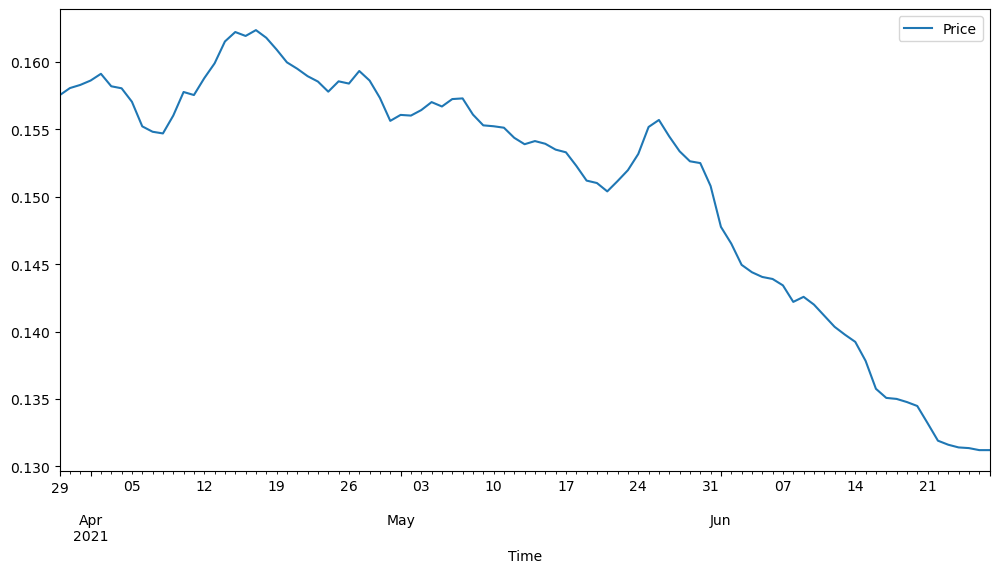

In [3]:
df.plot(figsize=(12,6))

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

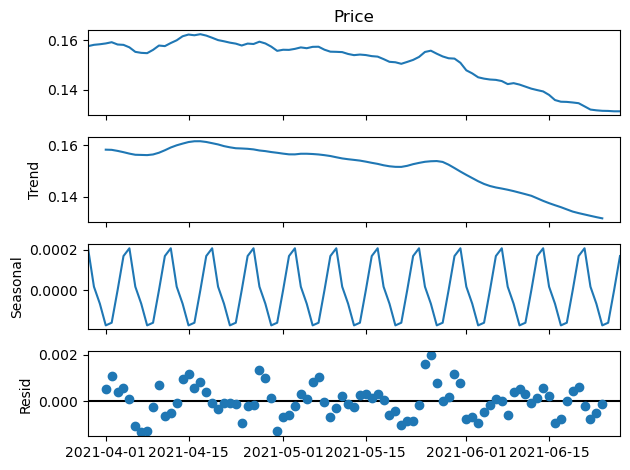

In [5]:
results = seasonal_decompose(df['Price'])
results.plot();

In [6]:
# Train and Test Split
train = df.iloc[:72]
test = df.iloc[72:]

In [7]:
# Holt-Winters Exponential Smoothing Model
# Holt-Winters Exponential Smoothing Model
model = ExponentialSmoothing(train['Price'], trend='add', seasonal='add', seasonal_periods=12, initialization_method="estimated")
fitted_model = model.fit(smoothing_level=0.5, smoothing_slope=0.1, smoothing_seasonal=0.2)

C:\Users\kilar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kilar\AppData\Local\Temp\ipykernel_31568\2942513402.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=0.5, smoothing_slope=0.1, smoothing_seasonal=0.2)


In [8]:
# Predictions
predictions = fitted_model.forecast(steps=len(test))

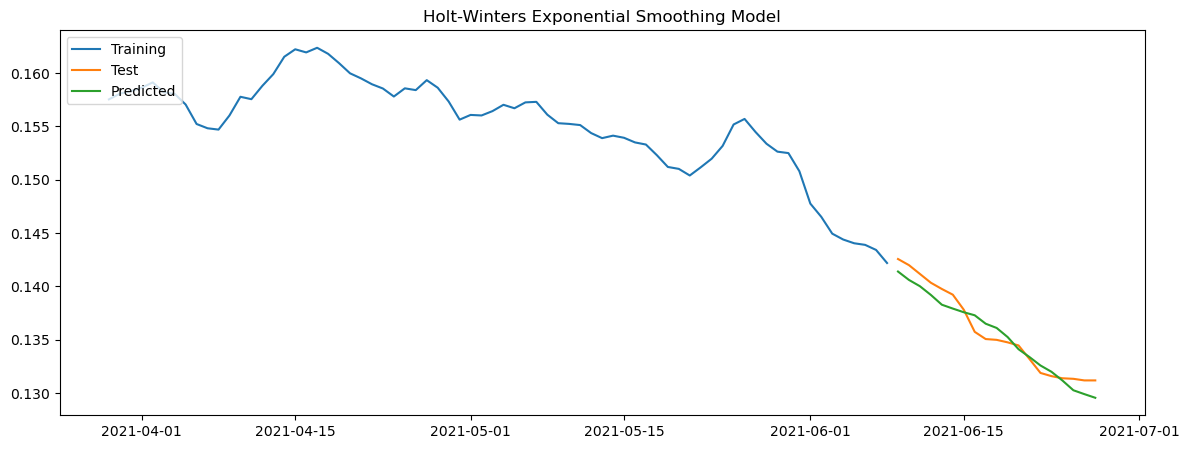

In [9]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(train['Price'], label='Training')
plt.plot(test['Price'], label='Test')
plt.plot(predictions, label='Predicted')
plt.legend(loc="upper left")
plt.title('Holt-Winters Exponential Smoothing Model')
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(test['Price'], predictions))
print("RMSE:", rmse)

RMSE: 0.0010791230198583714


In [11]:
r2 = r2_score(test['Price'], predictions)
print("R^2:", r2)

R^2: 0.9238711454941614


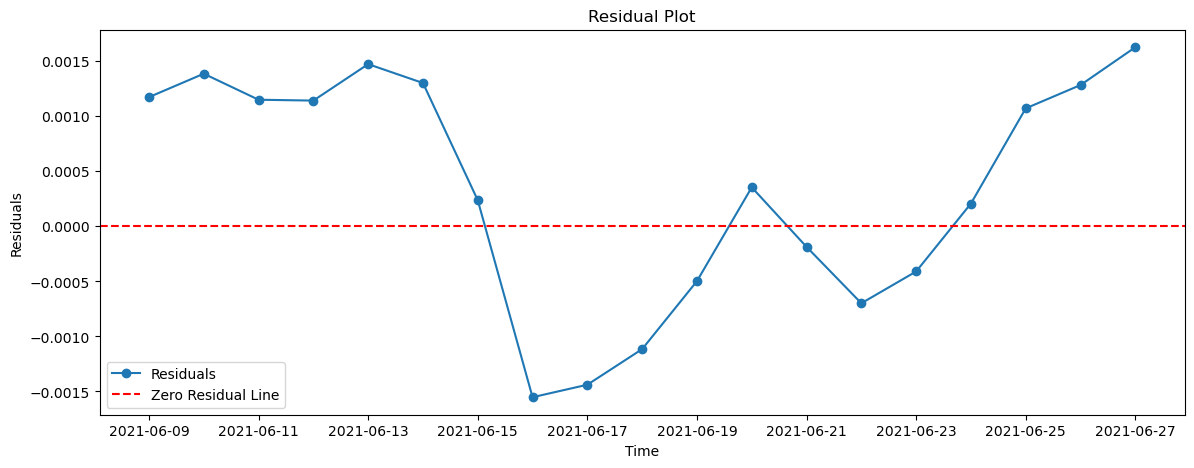

In [12]:

residuals = test['Price'] - predictions
plt.figure(figsize=(14, 5))
plt.plot(residuals, label='Residuals', marker='o')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.legend()
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


A residual plot to visualize the differences between the observed values in the test set and the predicted values from the Holt-Winters model. Residual plots are helpful to identify patterns or trends that the model might have missede here the residuals are calculated by subtracting the predicted values from the actual values in the test set and then creates a plot of these residuals over time. The red dashed line represents the zero residual line, helping you identify if there are systematic patterns in the residuals.

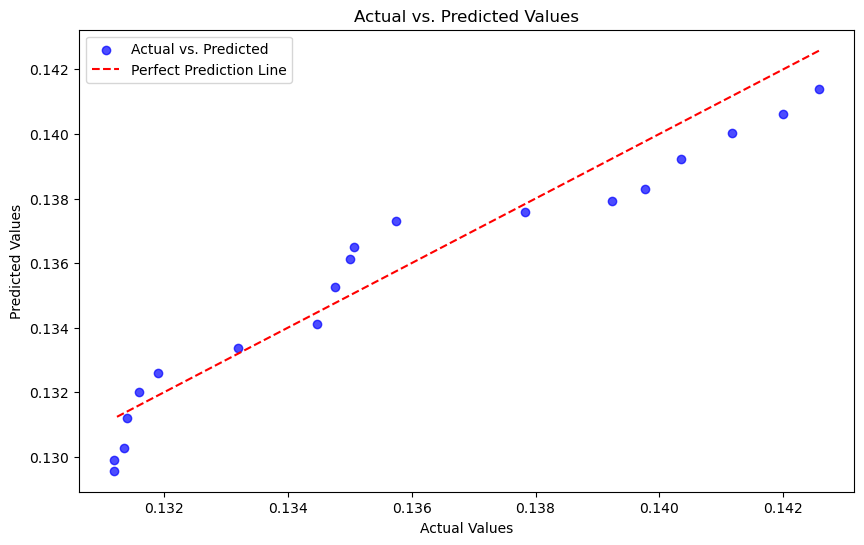

In [13]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(test['Price'], predictions, color='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot(test['Price'], test['Price'], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


The scatter function is used to create a scatter plot with actual values on the x-axis and predicted values on the y-axis. The red dashed line represents a perfect prediction, where the actual and predicted values are identical. This visualization helps you quickly assess how well the model is performing across the range of actual values and This can give you a visual sense of how well the model's predictions align with the true values.

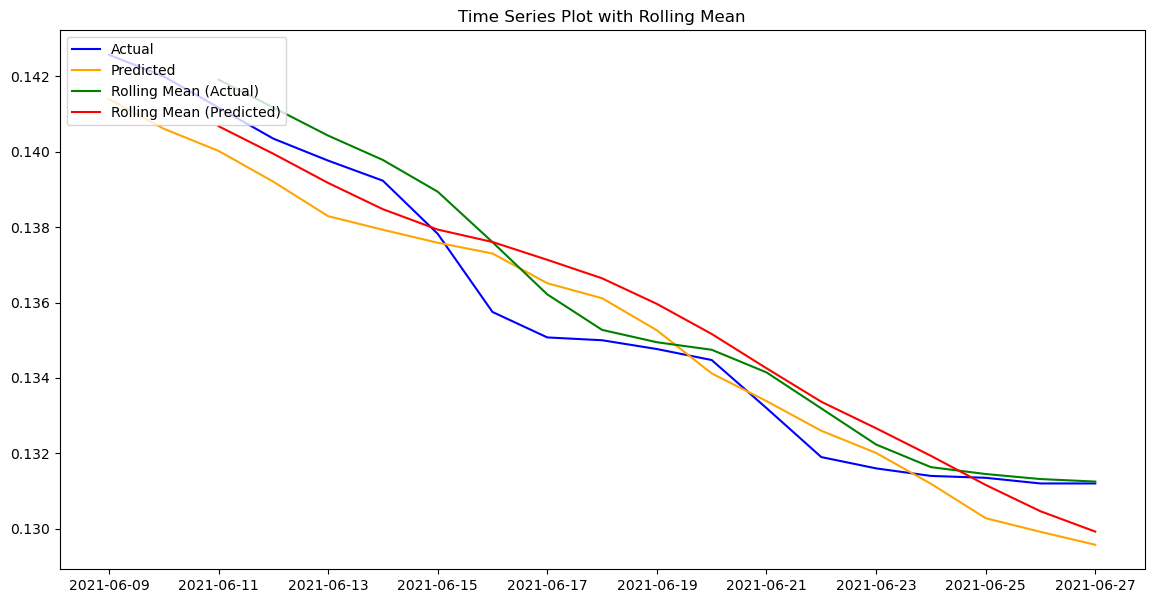

In [14]:
# Time Series Plot with Rolling Mean
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Price'], label='Actual', color='blue')
plt.plot(predictions.index, predictions, label='Predicted', color='orange')
rolling_mean_actual = test['Price'].rolling(window=3).mean()
plt.plot(test.index, rolling_mean_actual, label='Rolling Mean (Actual)', color='green')
rolling_mean_predicted = predictions.rolling(window=3).mean()
plt.plot(predictions.index, rolling_mean_predicted, label='Rolling Mean (Predicted)', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Plot with Rolling Mean')
plt.show()


The rolling mean is calculated using the rolling method with a window size of 3. The actual values with their rolling mean are plotted in green, and the predicted values with their rolling mean are plotted in red. This allows us to compare the trends in both the actual and predicted values over time and this can help smooth out fluctuations and highlight trends over time.

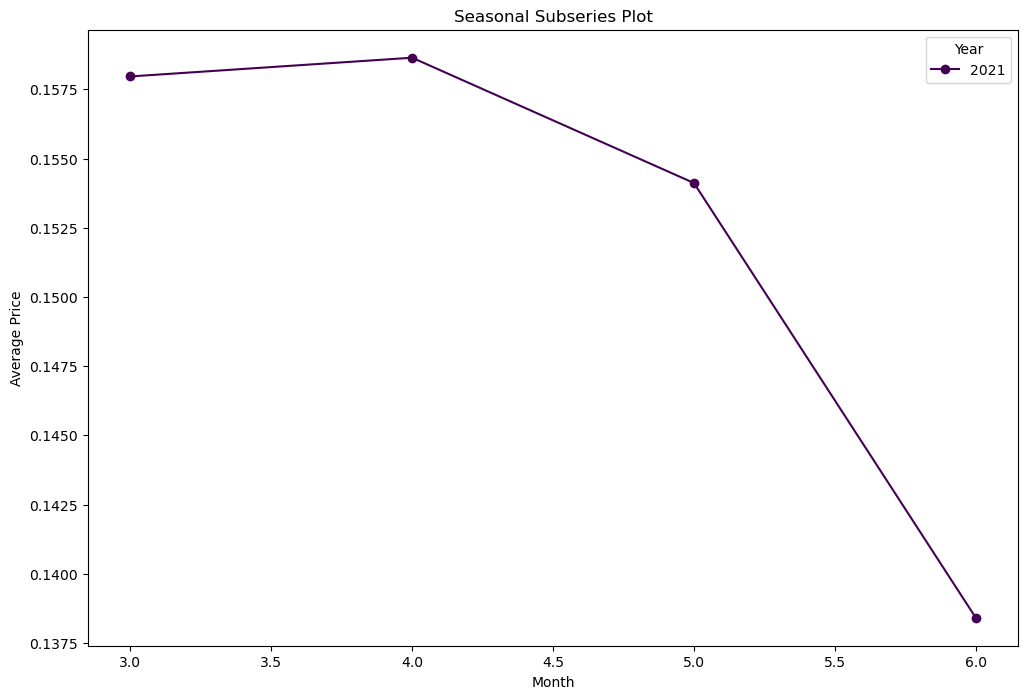

In [15]:
# Assuming your data has a 'DateTime' index, adjust as needed
df['Year'] = df.index.year
df['Month'] = df.index.month
pivot_df = df.pivot_table(values='Price', index='Month', columns='Year', aggfunc='mean')
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_df.columns)))

for i, year in enumerate(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[year], label=str(year), color=colors[i], marker='o')

plt.title('Seasonal Subseries Plot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()


Seasonal subseries plot is particularly useful for visualizing seasonality in time series data, allowing us to observe patterns within each season across different time periods. The plot displays subseries for each month, and each line represents the average price for that month. This visualization helps to identify seasonal patterns within each month and provides insights into how these patterns evolve over the years.

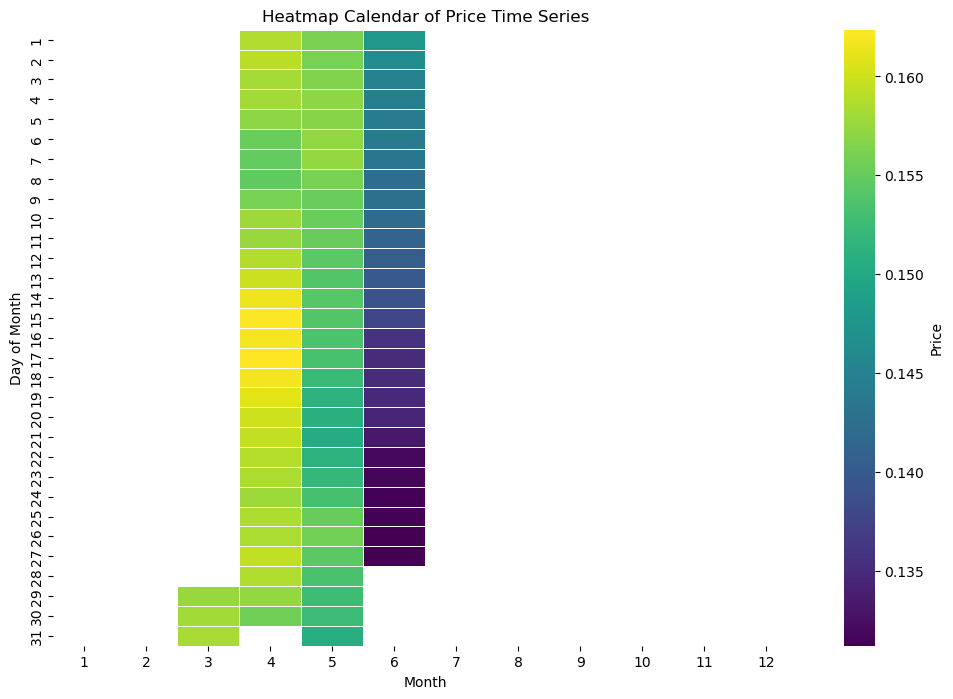

In [16]:
import calendar
import seaborn as sns
df['Day'] = df.index.day
df['Month'] = df.index.month
heatmap_data = df.pivot_table(values='Price', index='Day', columns='Month', aggfunc='mean')
heatmap_data = heatmap_data.reindex(columns=range(1, 13), index=range(1, 32))
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Price'}, linewidths=0.5)
plt.title('Heatmap Calendar of Price Time Series')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.show()


Heatmap Calendar will visualize the temporal patterns of the time series data over the entire year. This type of visualization is useful for understanding how values change over time and can reveal daily, weekly, or monthly trends.

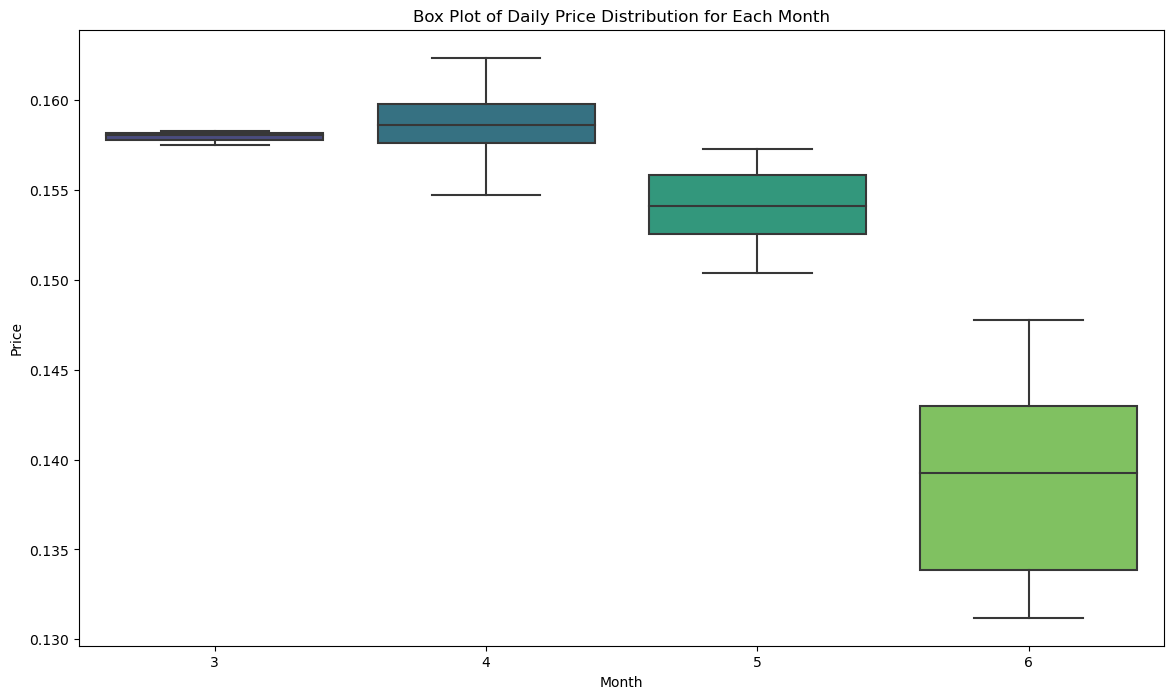

In [17]:
import seaborn as sns
df['Day'] = df.index.day
df['Month'] = df.index.month
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Price', data=df, palette='viridis')
plt.title('Box Plot of Daily Price Distribution for Each Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


Box Plot of the daily price distribution for each month. This can help us to explore the variability and central tendency of prices within each month. This visualization allows us to observe the spread and central tendency of prices for each month, providing insights into the distributional characteristics of the data across different months.

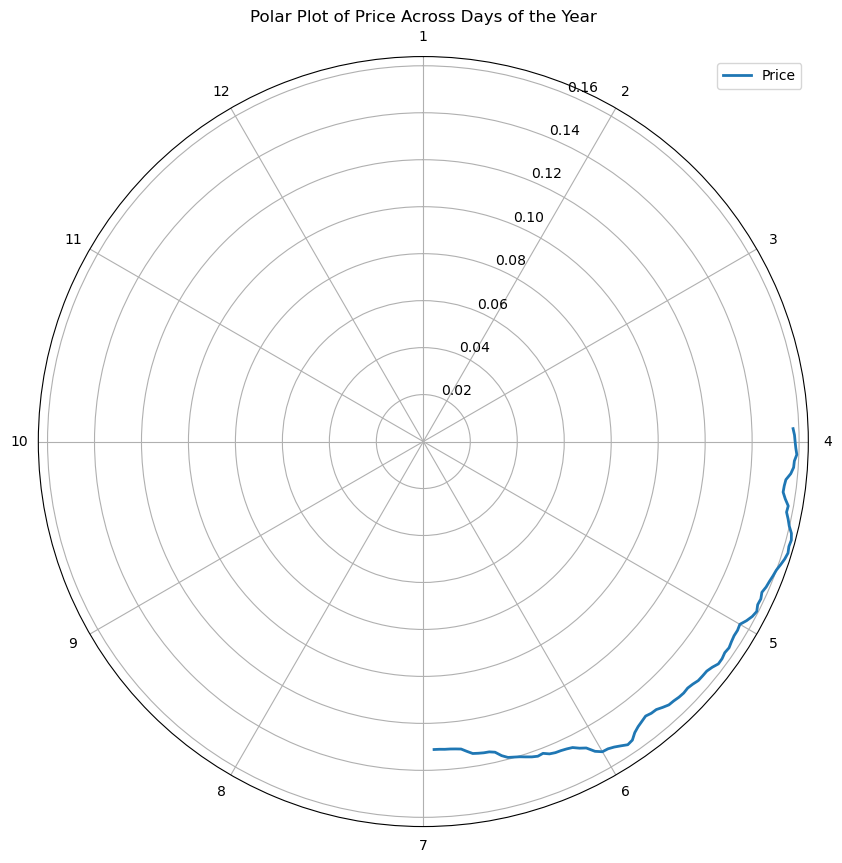

In [18]:
import numpy as np
df['DayofYear'] = df.index.dayofyear
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.plot(np.radians(df['DayofYear']), df['Price'], label='Price', linewidth=2)
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax.set_xticklabels([str(i) for i in range(1, 13)])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Polar Plot of Price Across Days of the Year')
ax.legend()

plt.show()


Polar Plot will display the cyclic nature of your time series data, especially if there is a seasonal or periodic pattern. This type of plot can help highlight trends that repeat at regular intervals. This visualization is useful for capturing seasonal patterns that may repeat annually, and it provides a different perspective on cyclic trends in your time series data.